# Machine Learning Mini Project 1
S M Zahid Hasan

## Importing Libraries and Reading CSV

In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('bank-additional-full.csv', delimiter = ';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

### Numeric Features Histogram

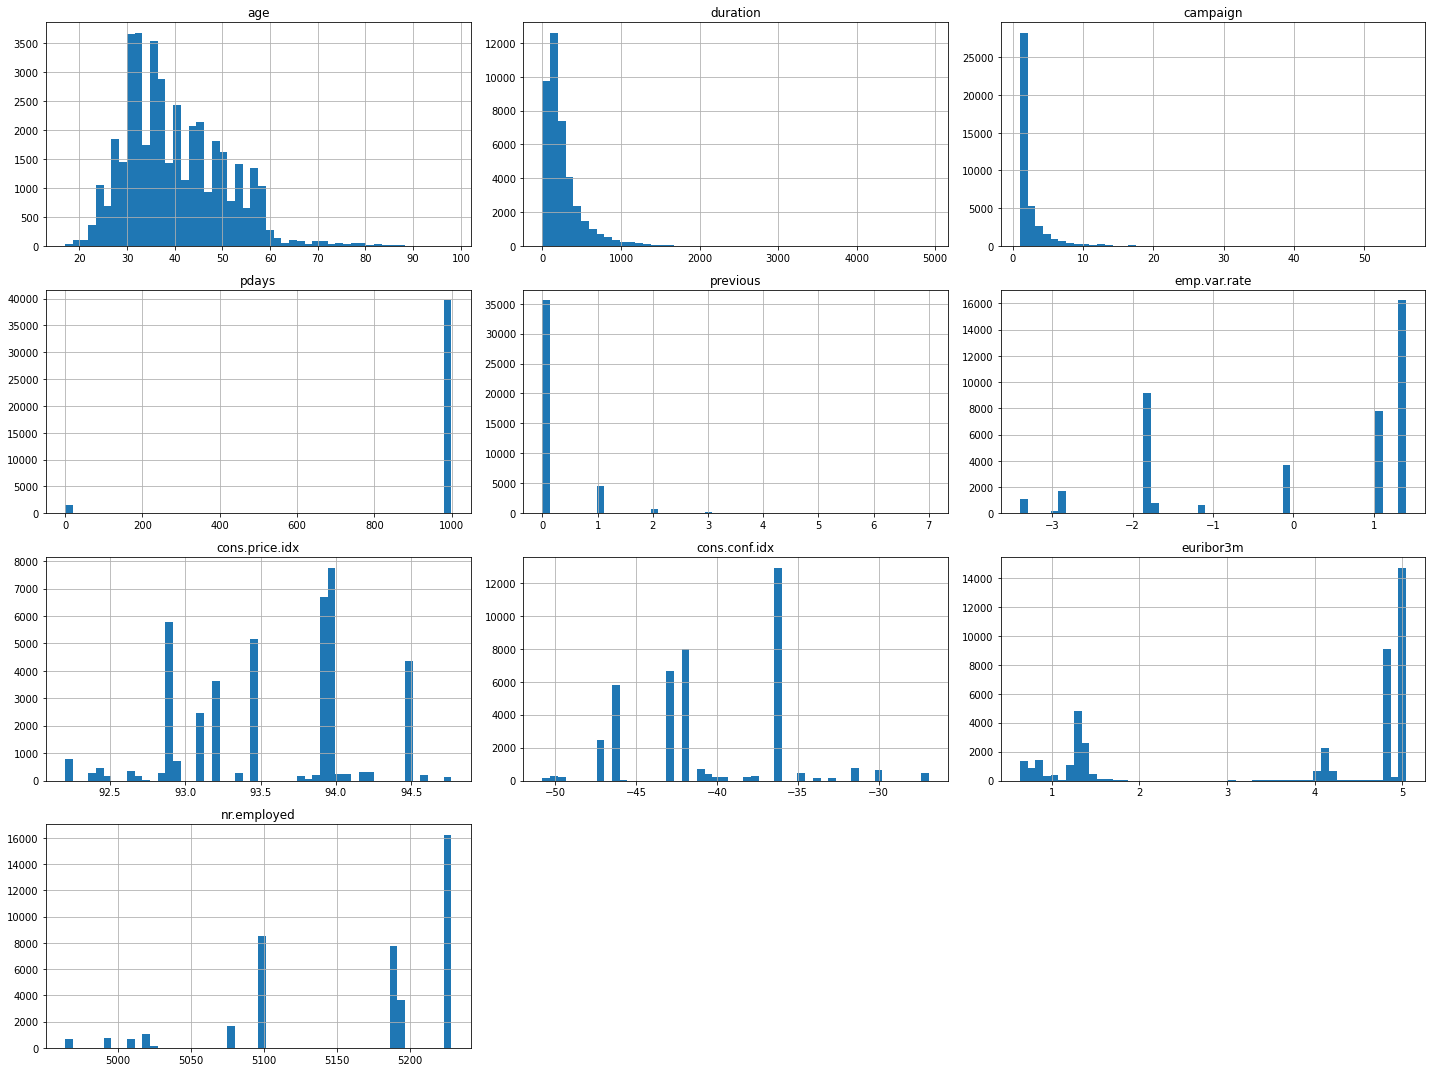

In [ ]:
# select only numeric columns
df_numeric = dataset.select_dtypes(include=[np.number])

# plot histogram for each numeric column
df_numeric.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


### Categorical Features Histogram

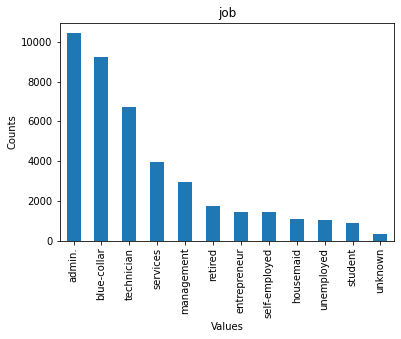

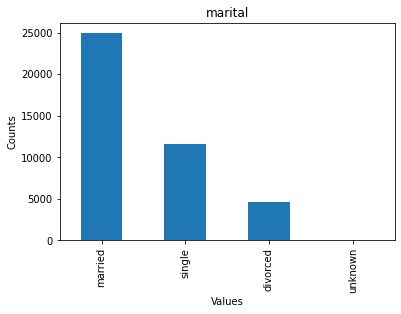

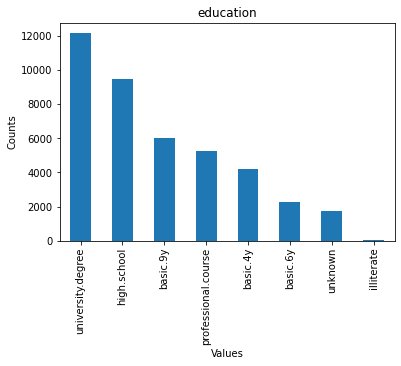

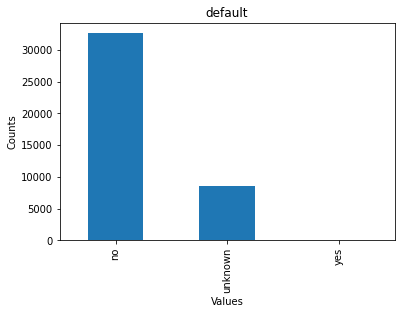

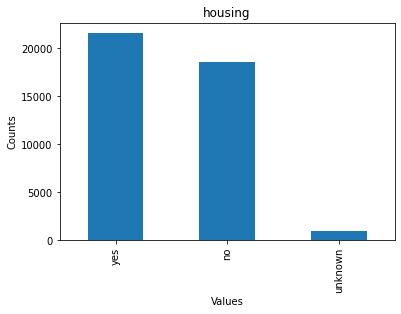

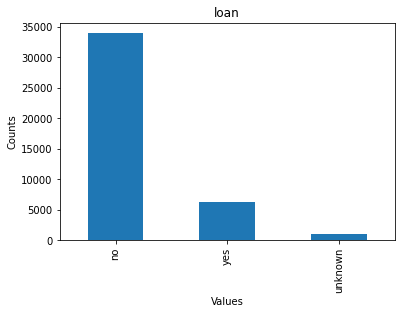

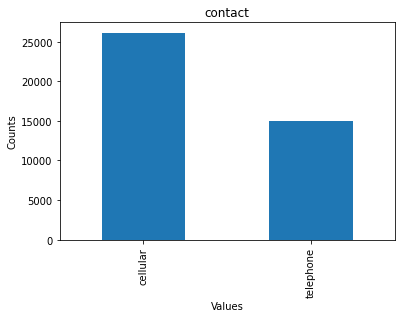

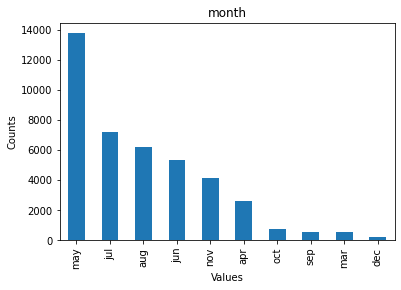

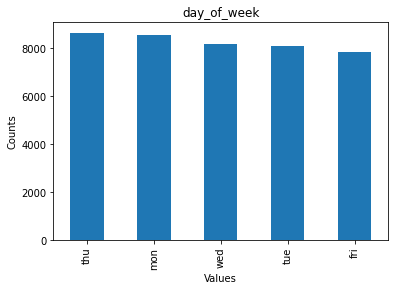

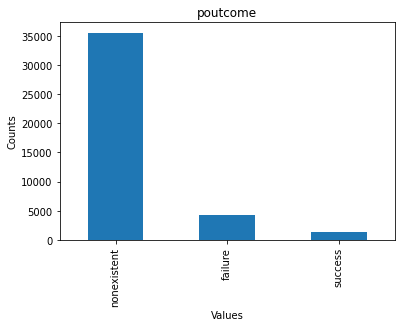

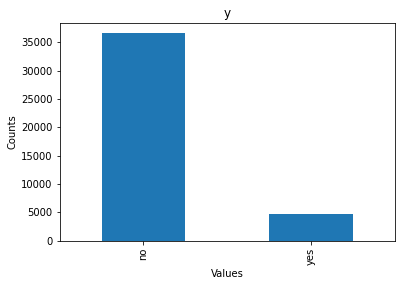

In [ ]:
import matplotlib.pyplot as plt

# Select only the categorical columns
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns
df_categorical = dataset[categorical_features]

# Plot a histogram for each categorical column
for column in df_categorical.columns:
    df_categorical[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.show()

### Label Encoder, Heatmap & Feature Selection

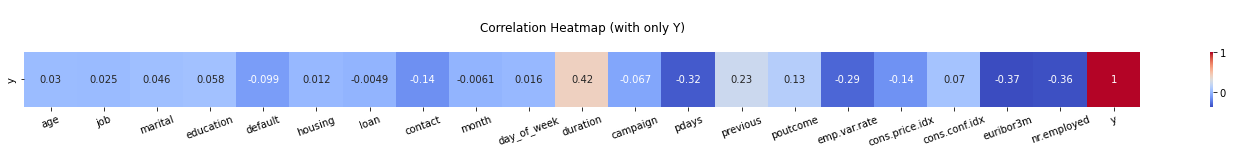

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
LE = LabelEncoder()

for col in dataset.columns:
  dataset[col]=LE.fit_transform(dataset[col])
        
plt.figure(figsize=(25, 1))

hm = sns.heatmap(dataset.corr().loc[['y'], :], annot = True, fmt='.2g',cmap= 'coolwarm')
loc, labels = plt.xticks()

hm.set_xticklabels(labels, rotation=20)
hm.set_title('\nCorrelation Heatmap (with only Y)\n');

In [ ]:
dataset = dataset.drop(['duration', 'pdays', 'previous', 'day_of_week', 'contact'], axis = 1)

## Feature Engineering

In [ ]:
## Handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

In [ ]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

In [ ]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features

[]

In [ ]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['y'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [ ]:
# Select only the categorical columns
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns
df_categorical = dataset[categorical_features]

# One-hot encode all categorical columns
dataset = pd.get_dummies(dataset, columns=categorical_features, prefix=categorical_features, drop_first= True)


In [ ]:
dataset.head

<bound method NDFrame.head of        age  job  marital  education  default  housing  loan  month  campaign  \
0       39    3        1          0        0        0     0      6         0   
1       40    7        1          3        1        0     0      6         0   
2       20    7        1          3        0        2     0      6         0   
3       23    0        1          1        0        0     0      6         0   
4       39    7        1          3        0        0     2      6         0   
...    ...  ...      ...        ...      ...      ...   ...    ...       ...   
41183   56    5        1          5        0        2     0      7         0   
41184   29    1        1          5        0        0     0      7         0   
41185   39    5        1          6        0        2     0      7         1   
41186   27    9        1          5        0        0     0      7         0   
41187   57    5        1          5        0        2     0      7         2   

       po

## Split Data Train and Test

In [ ]:
X = dataset.drop('y', axis = 1)
y = dataset['y']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_train

array([[ 0.28664375, -0.75652095, -0.28448752, ..., -1.06311443,
        -0.71390548, -0.75868918],
       [-1.92266981,  0.91223802,  1.35429987, ..., -0.72822802,
         0.71663889,  0.87519317],
       [-0.86604158, -1.03464744, -0.28448752, ...,  0.94620401,
         0.46848323,  0.058252  ],
       ...,
       [-0.9620987 ,  0.07785854, -0.28448752, ..., -0.72822802,
         0.74583367,  0.87519317],
       [ 0.09452953,  0.91223802, -1.92327492, ..., -0.39334162,
         0.5268728 ,  0.87519317],
       [ 1.72750041,  1.74661751, -0.28448752, ...,  1.11364721,
         0.81882063,  0.87519317]])

## Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, PReLU, ELU, LeakyReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
# Input layers
classifier.add(Dense(units=15, activation = 'relu'))

In [ ]:
# Hidden layer 1
classifier.add(Dense(units=8, activation = 'relu'))

In [ ]:
# Hidden layer 2
classifier.add(Dense(units=7, activation = 'relu'))

In [ ]:
# Output layer
classifier.add(Dense(units=1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Defining Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# Training the model
model_history = classifier.fit(X_train,y_train, validation_split= 0.33, epochs = 50, callbacks= early_stopping )

Epoch 1/50
690/690 [==============================] - 5s 4ms/step - loss: 0.3385 - accuracy: 0.8675 - val_loss: 0.2986 - val_accuracy: 0.8950
Epoch 2/50
690/690 [==============================] - 3s 4ms/step - loss: 0.2807 - accuracy: 0.9011 - val_loss: 0.2929 - val_accuracy: 0.8965
Epoch 3/50
690/690 [==============================] - 3s 4ms/step - loss: 0.2774 - accuracy: 0.9017 - val_loss: 0.2923 - val_accuracy: 0.8967
Epoch 4/50
690/690 [==============================] - 3s 4ms/step - loss: 0.2761 - accuracy: 0.9021 - val_loss: 0.2917 - val_accuracy: 0.8968
Epoch 5/50
690/690 [==============================] - 3s 4ms/step - loss: 0.2752 - accuracy: 0.9029 - val_loss: 0.2905 - val_accuracy: 0.8968
Epoch 6/50
690/690 [==============================] - 3s 4ms/step - loss: 0.2749 - accuracy: 0.9025 - val_loss: 0.2906 - val_accuracy: 0.8965
Epoch 7/50
690/690 [==============================] - 3s 4ms/step - loss: 0.2741 - accuracy: 0.9026 - val_loss: 0.2896 - val_accuracy: 0.8960
Epoch 

## Plotting the Model

### Model Accuracy

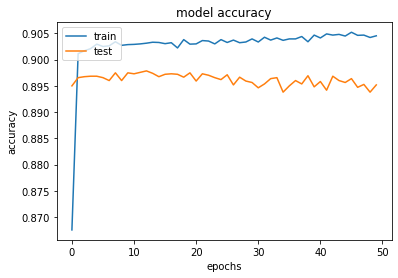

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model Loss

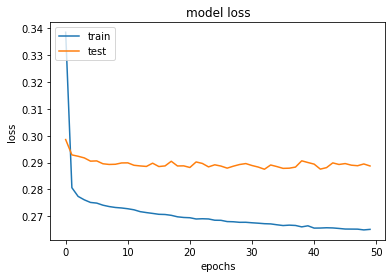

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model Prediction

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

258/258 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7140,  144],
       [ 742,  212]])

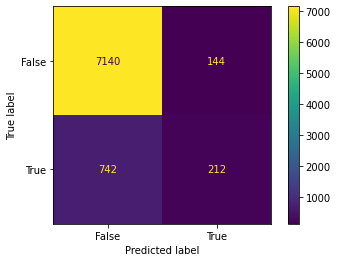

In [ ]:

from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

## Neural Network Architecture

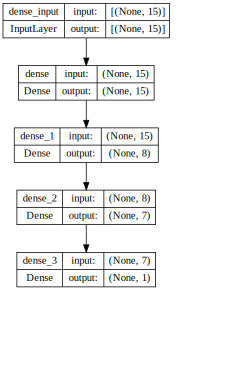

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

SVG(model_to_dot(classifier, show_shapes=True).create(prog='dot', format='svg'))

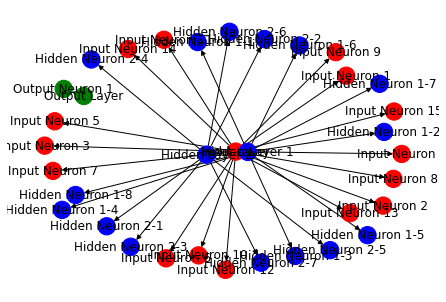

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_ann_architecture(n_inputs, n_hidden_layers, n_neurons, n_outputs):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add input layer
    G.add_node("Input Layer", node_color='red')
    for i in range(n_inputs):
        G.add_node("Input Neuron {}".format(i+1), node_color='red')
        G.add_edge("Input Layer", "Input Neuron {}".format(i+1))
        
    # Add hidden layers
    for i in range(n_hidden_layers):
        G.add_node("Hidden Layer {}".format(i+1), node_color='blue')
        for j in range(n_neurons[i]):
            G.add_node("Hidden Neuron {}-{}".format(i+1, j+1), node_color='blue')
            G.add_edge("Hidden Layer {}".format(i+1), "Hidden Neuron {}-{}".format(i+1, j+1))
            
    # Add output layer
    G.add_node("Output Layer", node_color='green')
    for i in range(n_outputs):
        G.add_node("Output Neuron {}".format(i+1), node_color='green')
        G.add_edge("Output Layer", "Output Neuron {}".format(i+1))
    
    # Plot the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=[G.nodes[n]['node_color'] for n in G.nodes])
    nx.draw_networkx_labels(G, pos)
    plt.show()

# Example architecture
n_inputs = 15
n_hidden_layers = 2
n_neurons = [8, 7]
n_outputs = 1

# Plot the ANN architecture
plot_ann_architecture(n_inputs, n_hidden_layers, n_neurons, n_outputs)
